In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la

# Problem 1

Begin with the equation 
\begin{equation}
(A^TN^{-1}A)m = A^TN^{-1}x.
\end{equation}
Next, letting $A = QR$, where $Q$ is orthogonal, rectangular and $R$ is a triangular matrix, the above becomes
\begin{equation}
(QR)^TN^{-1}QR)m = (QR)^TN^{-1}x\\
(R^TQ^TN^{-1}QR)m = R^TQ^TN^{-1}x.
\end{equation}
Next, Cholesky-decomposing $N^{-1}$, e.g. $N^{-1} = LL^T$ and subsituting into the above equation, we find
\begin{equation}
(R^TQ^TLL^TQR)m = R^TQ^TLL^Tx.
\end{equation}

The final expression yields:
\begin{equation}
m = R^{-1}Q^Td
\end{equation}

TODO: FIGURE OUT HOW THIS WORKS WITH NOISE.

### Comparison of classical vs QR

In [34]:
# Create some data to fit polynomials to
def _func(x):
    return np.cos(x) + np.sin(x)

def get_fits(order):
    
    x = np.linspace(-2,2,1000)
    y = _func(x)
    
    n = len(x)

    # Construct A matrix
    A = np.zeros([n, order+1])
    for i in range(order+1):
        A[:,i] = x**i

    # Classical method
    lhs = A.T@A
    rhs = A.T@y
    m_classical = np.linalg.inv(lhs)@rhs
    y_fit_classical = A@m_classical

    q, r = np.linalg.qr(A)
    m_qr = np.linalg.inv(r)@q.T@y
    y_fit_qr = A@m_qr
    
    return y_fit_classical, y_fit_qr


#### Low order

For our first test, we'll set the order of the polynomial to something small, so we expect both the classical method and QR to work. 

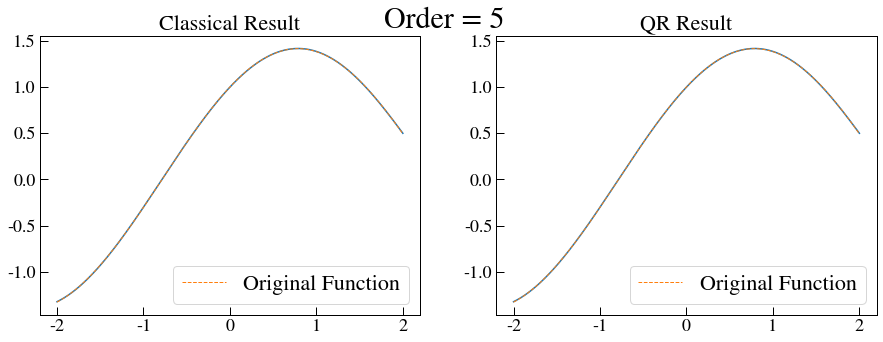

In [51]:
order = 5
y_fit_classical, y_fit_qr = get_fits(order)

fig, axs = plt.subplots(1,2,figsize=(15,5))
fig.suptitle('Order = {0}'.format(order), fontsize=30)
axs[0].plot(x, y_fit_classical,)
axs[1].plot(x, y_fit_qr)
axs[0].plot(x, y, label = 'Original Function', ls='--', linewidth=1)
axs[1].plot(x, y, label = 'Original Function', ls='--', linewidth=1)
axs[0].legend()
axs[1].legend()
axs[0].set_title('Classical Result')
axs[1].set_title('QR Result')
plt.show()

As we can see, both are behaving well. 

#### High order

Let's now crank the order of the polynomial to see how they behave. 

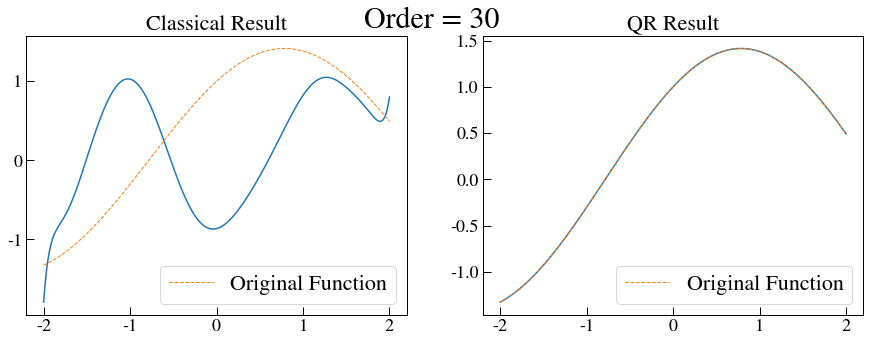

In [49]:
order = 30
y_fit_classical, y_fit_qr = get_fits(order)

fig, axs = plt.subplots(1,2,figsize=(15,5))
fig.suptitle('Order = {0}'.format(order), fontsize=30)
axs[0].plot(x, y_fit_classical,)
axs[1].plot(x, y_fit_qr)
axs[0].plot(x, y, label = 'Original Function', ls='--', linewidth=1)
axs[1].plot(x, y, label = 'Original Function', ls='--', linewidth=1)
axs[0].legend()
axs[1].legend()
axs[0].set_title('Classical Result')
axs[1].set_title('QR Result')
plt.show()

We can see that QR is now performing much better than the classical result, even at higher orders!

# Problem 2

## Part A

In [60]:
def fit_chebyshev(x, y, order, return_coeff=False):
    
    # generate A matrix
    A = np.polynomial.chebyshev.chebvander(x, order)
    
    lhs = A.T@A
    rhs = A.T@y
    
    m = np.linalg.inv(lhs)@rhs
    y_fit = A@m
    
    if return_coeff:
        return y_fit, m
    
    return y_fit

### Low Order

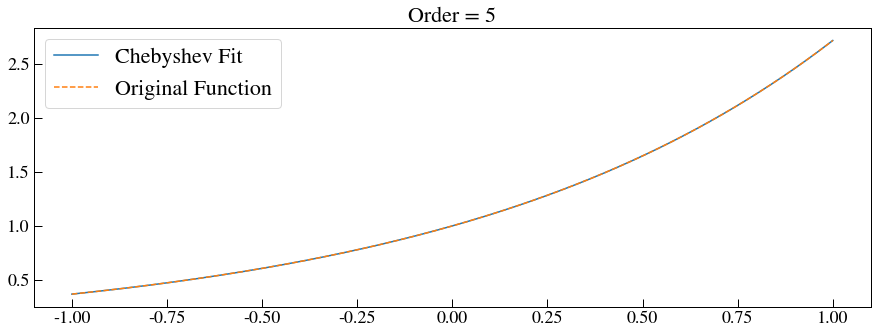

In [58]:
x = np.linspace(-1, 1, 1000)
y = np.exp(x)

order = 5
y_fit = fit_chebyshev(x, y, order)

plt.figure(figsize=(15,5))
plt.plot(x, y, label = 'Chebyshev Fit')
plt.plot(x, y, label = 'Original Function', ls='--')
plt.title('Order = {0}'.format(order))
plt.legend()
plt.show()

### High order

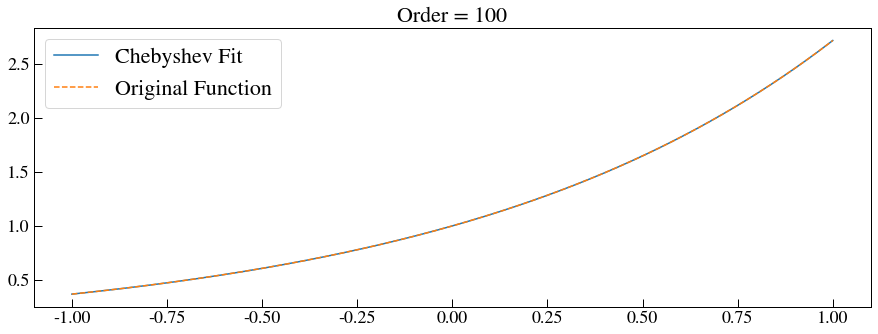

In [59]:
x = np.linspace(-1, 1, 1000)
y = np.exp(x)

order = 100
y_fit = fit_chebyshev(x, y, order)

plt.figure(figsize=(15,5))
plt.plot(x, y, label = 'Chebyshev Fit')
plt.plot(x, y, label = 'Original Function', ls='--')
plt.title('Order = {0}'.format(order))
plt.legend()
plt.show()

As we can see, even after cranking the order, the fit is still stable. 

## Part B

The answer to determining the max error is given by this sentence: $\textit{If we truncate a polynomial fit, the maximum error is bounded by the sum of the absolute value of the coefficients we truncated.}$

#### Fitting a 6th order Chebyshev to exp(x)

In [89]:
yfit, coeff = fit_chebyshev(x, y, order = 6, return_coeff = True)

rms = np.sqrt(np.mean((y-yfit)**2))
max_err = np.sum(np.abs(y - yfit)) 
print('RMS error:', rms)
print('Maximum error:', max_err)

RMS error: 1.9852969888239004e-06
Maximum error: 0.0017048544985497904


#### Fitting 100 order Chebyshev to exp(x)

In [93]:
yfit, coeff = fit_chebyshev(x, y, order=100, return_coeff = True)

truncated_coeff = coeff[0:7]

yfit_truncated = np.polynomial.chebyshev.chebval(x, truncated_coeff)

rms_truncated = np.sqrt(np.mean((y-yfit_truncated)**2))
max_err = np.sum(np.abs(y - yfit_truncated))
max_err_pred = np.sum(np.abs(coeff[7:]))

In [88]:
print('RMS error has increased by approximately {0} %'. format((rms_truncated - rms)/rms * 100))
print('Max error has decreased by approximately {0}%'.format('TODO'))

RMS error has increased by approximately 13.776998003491025 %
Max error has decreased by approximately TODO%


TODO: What is the equation for maximum error? 

# Problem 3

Recalling that in the new rotated space
\begin{equation}
\tilde{d} = Vd,
\end{equation} 
where $V$ is obtained by performing SVD on $N$. 

In [174]:
# Define N as Jon suggested 
ndim = 5
N = np.ones(shape=(ndim,ndim), dtype=np.float64)
np.fill_diagonal(N, N.diagonal() + 1)

# Perform SVD 
u, s, v = np.linalg.svd(N, 0)
L = np.linalg.cholesky(N)

# Generate many samples of Gaussian distributed points
nsim = 10000
d = np.random.randn(ndim, nsim)

# Generate random correlated data
data = np.zeros((ndim,ndim,d.shape[-1]))
for i in range(nsim):
    #d_new = u@s@v@d[:,i]
    d_new = L@d[:,i]
    data[:,:,i] = np.outer(d_new, d_new)

N_new = np.mean(data, axis = -1)
print(N_new)

[[2.02723625 1.00809276 1.01523265 1.0086804  1.00854579]
 [1.00809276 2.01743786 1.01050248 0.99347606 1.00081287]
 [1.01523265 1.01050248 2.00950193 1.01448936 1.00858471]
 [1.0086804  0.99347606 1.01448936 1.97447972 1.02138363]
 [1.00854579 1.00081287 1.00858471 1.02138363 2.00167152]]


TODO: CHOLESKY WORKS BUT NOT SURE WHAT TO DO FOR SVD.

# Problem 4

## Part A

In [208]:
x = np.arange(0,1000)
a = np.array([0.1,0.5,0.9])
sigma = np.array([5,50,500])

# Generate noise matrix
XX, YY = np.meshgrid(x, x)
i_j_2 = (XX - YY)**2
exp_ij = np.exp(-i_j_2[:,:,np.newaxis]/2*sigma**2)
N_1 = exp_ij[:,:,:,np.newaxis]*a
N_1 = N_1.swapaxes(-1,-2)
N_2 = (1 - a)*(np.eye(x.shape[0]))[:,:,np.newaxis]
N = N_1 + N_2[:,:,:,np.newaxis]

# Clean up indices
N = N.swapaxes(0,2)
N = N.swapaxes(1,3)

print('shape:(len(a), len(sigma), i, j)')
print(N.shape)

shape:(len(a), len(sigma), i, j)
(3, 3, 1000, 1000)


In [207]:
sig_src=50
y = np.exp(-x**2/(2*sig_src**2))

XX, YY = np.meshgrid(x, x)

# Fit each data 
for i in range(3):
    for j in range(3):
        
        _a = a[i]
        _sig = sigma[j]
        _N = _a * np.exp(-(XX - YY)**2 / (2*_sig**2)) + (1 - a)*np.eye(len(x))
        
        
        lhs = y[:,np.newaxis].T@